In [1]:
import torch
import torch.nn as nn
import hdbscan
from sklearn.cluster import KMeans
import re

In [2]:
embeddings = torch.load(r'/home/smitesh22/Data/DEM_embeddingv2.pt')

In [3]:
data = []
for embedding in embeddings:
    data.append(embeddings[embedding].flatten().detach().numpy())

In [4]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2)
labels = clusterer.fit_predict(data)

In [5]:
for loc, label in zip(list(embeddings.keys()), labels):
    print(f"{loc}  {label}")
                      

N15E078_wgs84  0
N19E072_wgs84  0
N20E074_wgs84  0
N22E074_wgs84  0
N32E076_wgs84  -1
N20E078_wgs84  0
N30E080_wgs84  -1
N30E078_wgs84  1
N31E078_wgs84  1
N22E079_wgs84  0
N25E071_wgs84  0
N27E093_wgs84  1
N24E086_wgs84  0
N23E084_wgs84  0
N24E071_wgs84  0
N23E082_wgs84  0
N24E093_wgs84  1
N23E069_wgs84  0
N24E085_wgs84  0
N28E094_wgs84  1
N27E071_wgs84  0
N23E087_wgs84  0
N23E079_wgs84  0
N21E074_wgs84  0
N09E078_wgs84  0
N09E092_wgs84  0
N27E072_wgs84  0
N16E082_wgs84  0
N33E076_wgs84  -1
N33E078_wgs84  1
N23E071_wgs84  0
N34E075_wgs84  -1
N29E074_wgs84  0
N26E091_wgs84  0
N22E069_wgs84  0
N15E073_wgs84  0
N14E077_wgs84  0
N27E073_wgs84  0
N23E078_wgs84  0
N13E092_wgs84  0
N27E088_wgs84  1
N24E081_wgs84  0
N17E073_wgs84  0
N32E078_wgs84  1
N32E077_wgs84  -1
N23E081_wgs84  0
N24E076_wgs84  0
N21E075_wgs84  0
N22E078_wgs84  0
N29E075_wgs84  0


In [6]:
k_values = range(1, 11)


inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)


/home/smitesh22/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/smitesh22/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/smitesh22/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/smitesh22/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sm

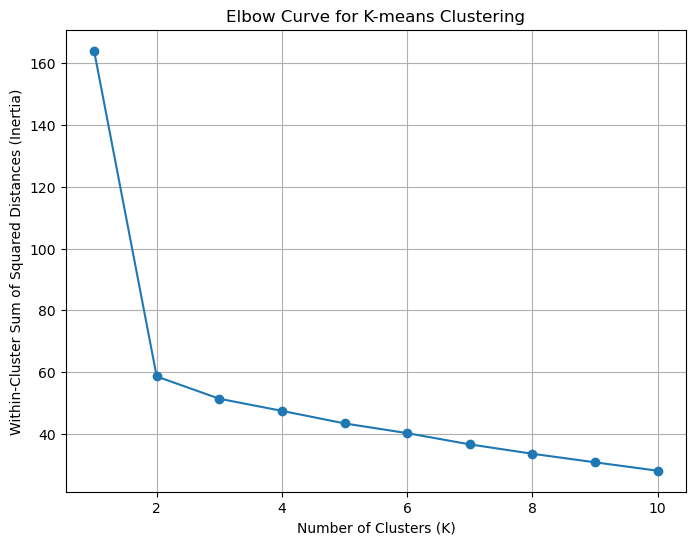

In [7]:
import matplotlib.pyplot as plt
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squared Distances (Inertia)')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [9]:
kmeans.fit(data)

/home/smitesh22/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [10]:
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
labels_dict = {}

for loc in zip(kmeans.labels_, embeddings.keys()):
    labels_dict[loc[1]] = loc[0]

In [12]:
labels_dict

{'N15E078_wgs84': 0,
 'N19E072_wgs84': 0,
 'N20E074_wgs84': 0,
 'N22E074_wgs84': 0,
 'N32E076_wgs84': 1,
 'N20E078_wgs84': 0,
 'N30E080_wgs84': 2,
 'N30E078_wgs84': 1,
 'N31E078_wgs84': 1,
 'N22E079_wgs84': 0,
 'N25E071_wgs84': 0,
 'N27E093_wgs84': 2,
 'N24E086_wgs84': 0,
 'N23E084_wgs84': 0,
 'N24E071_wgs84': 0,
 'N23E082_wgs84': 0,
 'N24E093_wgs84': 2,
 'N23E069_wgs84': 0,
 'N24E085_wgs84': 0,
 'N28E094_wgs84': 1,
 'N27E071_wgs84': 0,
 'N23E087_wgs84': 0,
 'N23E079_wgs84': 0,
 'N21E074_wgs84': 0,
 'N09E078_wgs84': 0,
 'N09E092_wgs84': 0,
 'N27E072_wgs84': 0,
 'N16E082_wgs84': 0,
 'N33E076_wgs84': 1,
 'N33E078_wgs84': 2,
 'N23E071_wgs84': 0,
 'N34E075_wgs84': 1,
 'N29E074_wgs84': 0,
 'N26E091_wgs84': 0,
 'N22E069_wgs84': 0,
 'N15E073_wgs84': 0,
 'N14E077_wgs84': 0,
 'N27E073_wgs84': 0,
 'N23E078_wgs84': 0,
 'N13E092_wgs84': 0,
 'N27E088_wgs84': 1,
 'N24E081_wgs84': 0,
 'N17E073_wgs84': 0,
 'N32E078_wgs84': 2,
 'N32E077_wgs84': 1,
 'N23E081_wgs84': 0,
 'N24E076_wgs84': 0,
 'N21E075_wgs

Location: N15E078_wgs84, Label: 0
Location: N19E072_wgs84, Label: 0
Location: N20E074_wgs84, Label: 0
Location: N22E074_wgs84, Label: 0
Location: N32E076_wgs84, Label: 1
Location: N20E078_wgs84, Label: 0
Location: N30E080_wgs84, Label: 2
Location: N30E078_wgs84, Label: 1
Location: N31E078_wgs84, Label: 1
Location: N22E079_wgs84, Label: 0
Location: N25E071_wgs84, Label: 0
Location: N27E093_wgs84, Label: 2
Location: N24E086_wgs84, Label: 0
Location: N23E084_wgs84, Label: 0
Location: N24E071_wgs84, Label: 0
Location: N23E082_wgs84, Label: 0
Location: N24E093_wgs84, Label: 2
Location: N23E069_wgs84, Label: 0
Location: N24E085_wgs84, Label: 0
Location: N28E094_wgs84, Label: 1
Location: N27E071_wgs84, Label: 0
Location: N23E087_wgs84, Label: 0
Location: N23E079_wgs84, Label: 0
Location: N21E074_wgs84, Label: 0
Location: N09E078_wgs84, Label: 0
Location: N09E092_wgs84, Label: 0
Location: N27E072_wgs84, Label: 0
Location: N16E082_wgs84, Label: 0
Location: N33E076_wgs84, Label: 1
Location: N33E

/tmp/ipykernel_204490/1113103759.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bbox_gdf = bbox_gdf.append({'geometry': bbox_polygon, 'color': 'green'}, ignore_index=True)
/tmp/ipykernel_204490/1113103759.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bbox_gdf = bbox_gdf.append({'geometry': bbox_polygon, 'color': 'green'}, ignore_index=True)
/tmp/ipykernel_204490/1113103759.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bbox_gdf = bbox_gdf.append({'geometry': bbox_polygon, 'color': 'green'}, ignore_index=True)
/tmp/ipykernel_204490/1113103759.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bbox_gdf = bbox_gdf.appe

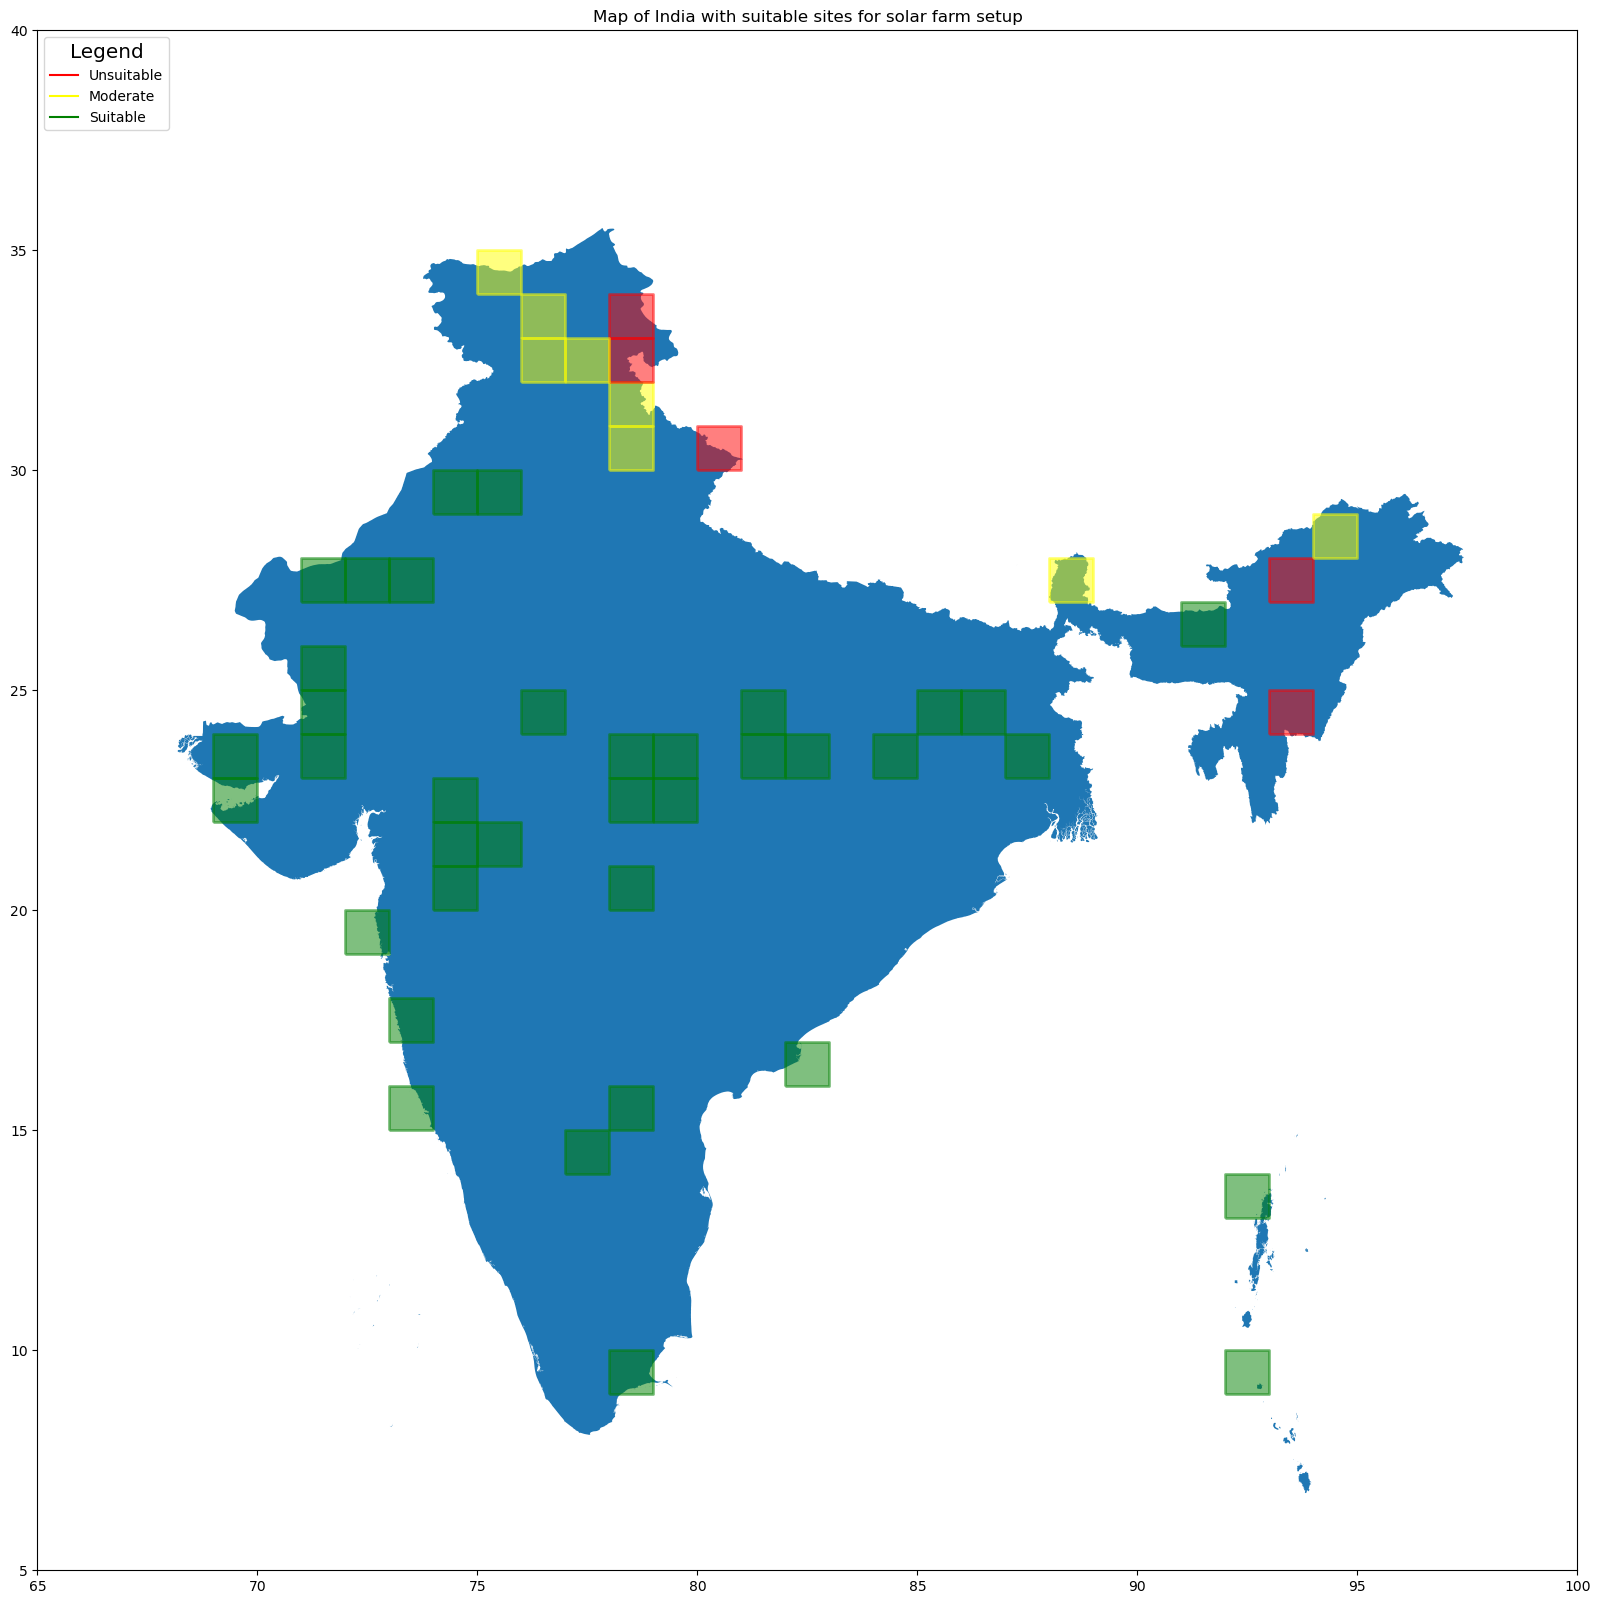

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import re

# Load the high-resolution shapefile for India
india_shapefile = "/home/smitesh22/Data/IND_shp.zip"
india_map = gpd.read_file(india_shapefile)

# Define an example labels_dict for testing

bbox_gdf = gpd.GeoDataFrame(columns=['geometry', 'color'], crs='EPSG:4326')

for loc, label in labels_dict.items():
    print(f"Location: {loc}, Label: {label}")

    # Example pattern to extract latitude and longitude from the location name
    pattern = r'(\d+)'
    matches = re.findall(pattern, loc)
    num = [int(match) for match in matches]

    latitude = [num[0], num[0]+1, num[0]+1, num[0]]
    longitude = [num[1], num[1], num[1]+1, num[1]+1]
    bbox_polygon = Polygon(zip(longitude, latitude))

    if label == 0:
        bbox_gdf = bbox_gdf.append({'geometry': bbox_polygon, 'color': 'green'}, ignore_index=True)
    elif label == 1:
        bbox_gdf = bbox_gdf.append({'geometry': bbox_polygon, 'color': 'yellow'}, ignore_index=True)
    elif label == 2:
        bbox_gdf = bbox_gdf.append({'geometry': bbox_polygon, 'color': 'red'}, ignore_index=True)

# Plot the India map with bounding boxes
fig, ax = plt.subplots(figsize=(20, 20))
india_map.plot(ax=ax)

bbox_gdf.plot(ax=ax, linewidth=2, edgecolor=bbox_gdf['color'], facecolor=bbox_gdf['color'], alpha=0.5)

# Set axis limits for better visualization
ax.set_xlim(65, 100)
ax.set_ylim(5, 40)

legend_labels = {
    'red': 'Unsuitable',
    'yellow': 'Moderate',
    'green': 'Suitable',
}
legend_handles = [plt.Line2D([], [], color=color, label=label) for color, label in legend_labels.items()]
legend = ax.legend(handles=legend_handles, title='Legend', loc='upper left')
legend.get_title().set_fontsize('x-large')
# Set a title
plt.title('Map of India with suitable sites for solar farm setup')

# Display the map
plt.show()
